In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
class blog_state(TypedDict):
    title:str
    outline:str
    content:str

In [3]:
load_dotenv()

True

In [4]:
model=ChatGoogleGenerativeAI(
    model='gemini-2.5-flash'
)

In [19]:
def generateOutline(state:blog_state)->blog_state:
    title=state['title']
    prompt=f'Generate a detailed outline for a blog on the topic : {title}'
    outline=model.invoke(prompt).content
    state['outline']=outline
    return state

In [20]:
def generateBlog(state:blog_state)->blog_state:
    title=state['title']
    outline=state['outline']
    prompt=f'Generate a blog on the topic {title} using the following outline : {outline}'
    blog=model.invoke(prompt).content
    state['content']=blog
    
    return state

In [12]:
graph=StateGraph(blog_state)

graph.add_node('generateOutline',generateOutline)
graph.add_node('generateBlog',generateBlog)

graph.add_edge(START,'generateOutline')
graph.add_edge('generateOutline','generateBlog')
graph.add_edge('generateBlog',END)

workflow=graph.compile()

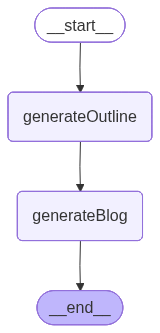

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [14]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here\'s a detailed outline for a blog post on the "Rise of AI in India," designed to be engaging, informative, and well-structured for a general audience interested in technology and global trends.\n\n---\n\n## Blog Title Options:\n\n*   **Unlocking the Future: The Rapid Rise of AI in India\'s Tech Landscape**\n*   **India\'s AI Ascendance: How a Nation is Redefining the Global Tech Frontier**\n*   **From Niche to National Imperative: Understanding the AI Revolution in India**\n*   **The Smart Surge: Decoding India\'s Fast-Paced Journey into Artificial Intelligence**\n\n---\n\n## Blog Outline: Unlocking the Future: The Rapid Rise of AI in India\'s Tech Landscape\n\n### I. Introduction (Approx. 150-200 words)\n\n*   **A. Hook:** Start with a captivating statement about AI\'s global transformative power and how it\'s not just a Western phenomenon.\n    *   *Example:* "Artificial Intelligence is no longer a futuristic concept confined to sci-fi

In [15]:
print(final_state['outline'])

Here's a detailed outline for a blog post on the "Rise of AI in India," designed to be engaging, informative, and well-structured for a general audience interested in technology and global trends.

---

## Blog Title Options:

*   **Unlocking the Future: The Rapid Rise of AI in India's Tech Landscape**
*   **India's AI Ascendance: How a Nation is Redefining the Global Tech Frontier**
*   **From Niche to National Imperative: Understanding the AI Revolution in India**
*   **The Smart Surge: Decoding India's Fast-Paced Journey into Artificial Intelligence**

---

## Blog Outline: Unlocking the Future: The Rapid Rise of AI in India's Tech Landscape

### I. Introduction (Approx. 150-200 words)

*   **A. Hook:** Start with a captivating statement about AI's global transformative power and how it's not just a Western phenomenon.
    *   *Example:* "Artificial Intelligence is no longer a futuristic concept confined to sci-fi novels; it's a driving force reshaping industries, economies, and dai